In [83]:
# autoreload 
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset_functions import plot_time_series, adjust_weekend_load, randomize_radiation, smoothen, generate_temperature_profile, create_daily_scales, adjust_bool_day
# Parameters
# np.random.seed(42)
hours = 240  # One year of hourly data
time = np.arange(hours)
time_pd = pd.date_range('2024-01-01', periods=hours, freq='H')
noise = .0
daily_scales = create_daily_scales(time_pd, 0.8)
daily_scales_2 = create_daily_scales(time_pd, 1.0)


temperature = generate_temperature_profile(time=time, noise=noise, daily_scales=daily_scales)
solar_radiation = np.clip(500 * np.sin(2 * np.pi * time / 24 - np.pi/4) + noise * np.random.normal(0, 50, hours), 0, None) * daily_scales
humidity = 60 + 10 * np.sin(2 * np.pi * time / 8760) + noise * np.random.normal(0, 5, hours)
# Base Load
base_load = 500 + 200 * np.sin(2 * np.pi * time / 24 - np.pi/3) + 100 * np.cos(2 * np.pi * time / 8760)

# Create DataFrame
df = pd.DataFrame({
    'time': pd.date_range('2024-01-01', periods=hours, freq='H'),
    'temperature': temperature,
    'solar_radiation': solar_radiation,
    'humidity': humidity,
})

df['temperature'] = smoothen(df, 'temperature', rolling_window=40)['temperature']

load = base_load + 5 * df['temperature'] - 1. * df['solar_radiation'] + noise * np.random.normal(0, 50, hours)
df['load'] = adjust_weekend_load(load, df['time'], 12,24,10,22)
print(df['load'])
df['load'] = adjust_bool_day(df['load'].values, df['time'], daily_scales_2, 16)
print(df['load'])
df['load'] = smoothen(df, 'load', rolling_window=14)['load']

plot_time_series(df, start_date='2024-01-05')

plt.plot(daily_scales_2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-01-01 00:00:00 2024-01-10 23:00:00
2024-01-01 00:00:00 2024-01-10 23:00:00
0      505.450575
1      539.115328
2      582.333423
3      632.223190
4      576.484850
          ...    
235    537.887124
236    504.523816
237    483.438748
238    476.071624
239    482.927287
Name: load, Length: 240, dtype: float64
Upward transitions: 1, downward transitions: 1
Upward transitions: [24], downward transitions: [96]
0      303.270345
1      323.469197
2      349.400054
3      379.333914
4       345.89091
          ...    
235    322.732274
236    302.714289
237    290.063249
238    285.642975
239    289.756372
Name: load, Length: 240, dtype: object


/home/robers/projects/TimeXer/playgrounds/dataset_functions.py:217: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('15min').mean()


KeyError: 'load'

Upward transitions: 2, downward transitions: 2
Upward transitions: [ 48 168], downward transitions: [144 216]


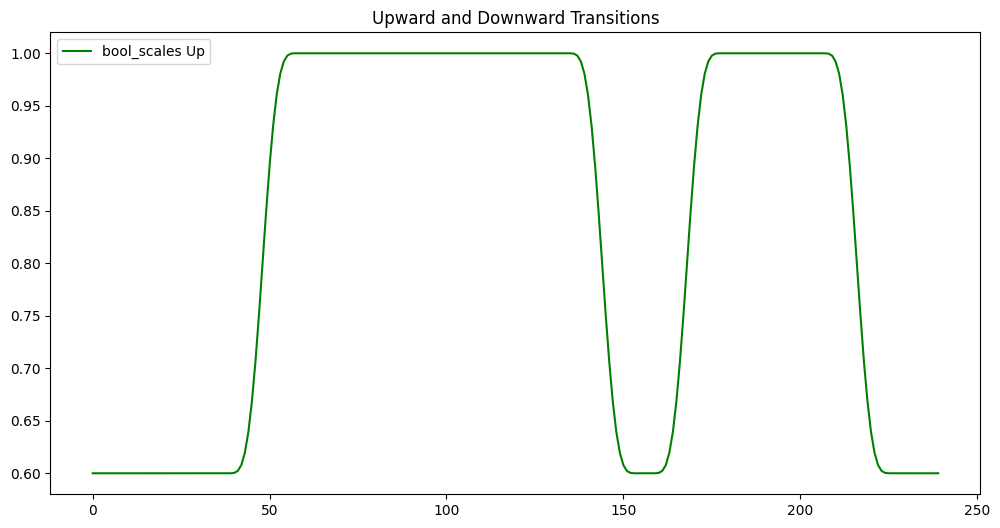

In [63]:
from dataset_functions import adjust_bool_day

# Using the adjust_bool_day function
bool_scales = adjust_bool_day(load, df['time'], daily_scales)

# Plot upward and downward transitions
plt.figure(figsize=(12, 6))
plt.plot(bool_scales, label='bool_scales Up', color='green')
plt.title('Upward and Downward Transitions')
plt.legend()
plt.show()


